In [11]:
import pandas as pd
import numpy as np
import math
from collections import Counter
import operator
import matplotlib.pyplot as plt
data=pd.read_csv('RobotDataset/Robot2', sep=' ', usecols=[1,2,3,4,5,6,7],header=None)
Errors = []
from numpy.linalg import norm
from numpy import dot

In [12]:
data,testdata= np.split(data,[int(0.80*len(data))])
# print(len(data))
# print(len(testdata))

In [13]:
def maxfreq(arrayd):
    c=Counter(arrayd)
    value,count= c.most_common()[0]
#     print("most common",value)
    return value    

In [14]:
def manhattandistance(datarow,testrow):
    dist=0
    for x in range(len(datarow.keys())-1):
        dist+= abs(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]]);

    return dist

In [15]:
def chebyshevdistance(datarow,testrow):
    dist=0
    for x in range(len(datarow.keys())-1):
        dist= max(dist,abs(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]]));

    return dist

In [16]:
def cosinedistance(x, y):
    x=np.array(x)
    y=np.array(y)
    return dot(x, y)/((norm(x))*norm(y))

In [17]:
def eucliddistance(datarow,testrow):
#     print("datarow", datarow)
#     print("testrow", testrow)
    dist=0
    for x in range(len(datarow.keys())-1):
#         print("values of both the rows",datarow[datarow.keys()[x]],testrow[testrow.keys()[x]])
        dist+= math.pow(datarow[datarow.keys()[x]]-testrow[testrow.keys()[x]],2);
#         print("dist",dist)
    
    dist= math.sqrt(dist)
    return dist

In [18]:
def finddistances(data,testdata,k):
    global correct
    global wrong,tp,fp,tn,fn
    correct=0
    wrong=0
    for x in range(len(testdata)):
        distancevector=[]
        for y in range(len(data)):
#             print(data.iloc[y],testdata.iloc[x])
            dist= manhattandistance(data.iloc[y],testdata.iloc[x])
            datarow = data.iloc[y]
            distancevector.append((dist,datarow[datarow.keys()[0]]))
        
#         print(distancevector)
        sorted_d = sorted(distancevector)
#         print(sorted_d)
        i=0
        arrayd=[]
        
        for key in sorted_d:
            if i==k:
                break
            arrayd.append(key[1])
            i+=1
        
#         print("arrayd", arrayd)
        
        predictedlabel = maxfreq(arrayd)
#         print("two values to be compared",predictedlabel, list(testdata.iloc[x])[0])
        
        if predictedlabel== list(testdata.iloc[x])[0]:
            if predictedlabel==0:
                tn+=1
            else:
                tp+=1
            correct+=1
        else:
            if predictedlabel==0:
                fn+=1
            else:
                fp+=1
            wrong+=1
   
    accuracy=correct/(wrong+correct)
    precision=(tp/(tp+fp))
    recall=(tp/(tp+fn))
    f1score=(2/((1/precision)+(1/recall)))
    return accuracy,precision,recall,f1score

In [19]:
ylabel=[]
xlabel=[]
correct=0
wrong=0
A=[]
F=[]
P=[]
R=[]

for x in range(1, int(math.sqrt(len(data)))):
    tp=0;
    tn=0;
    fp=0;
    fn=0;
    accuracy,precision,recall,f1score=finddistances(data,testdata,x)
    A.append(accuracy)
    P.append(precision)
    F.append(f1score)
    R.append(recall)
    ylabel.append(accuracy)
    xlabel.append(x)

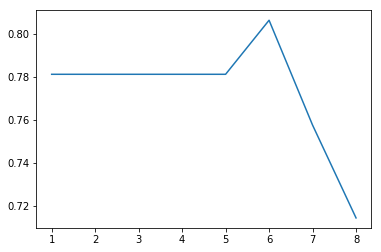

In [20]:
plt.plot(xlabel, ylabel)
plt.show()

In [77]:
# print(len(data))
# print(len(testdata))
# finddistances(data, testdata, 10)
print(ylabel)

[0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6578947368421053, 0.6410256410256411, 0.6578947368421053, 0.6410256410256411, 0.6578947368421053]


In [78]:
Errors.append(ylabel)

In [79]:
R

[0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365]

In [80]:
Errors[2]

[0.6578947368421053,
 0.6578947368421053,
 0.6578947368421053,
 0.6578947368421053,
 0.6410256410256411,
 0.6578947368421053,
 0.6410256410256411,
 0.6578947368421053]

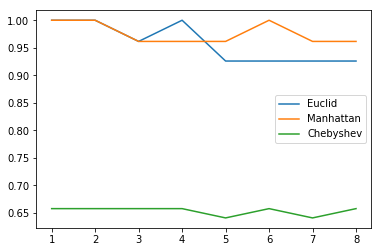

In [81]:
plt.plot(xlabel, Errors[0])
plt.plot(xlabel, Errors[1])
plt.plot(xlabel, Errors[2])
plt.gca().legend(('Euclid','Manhattan','Chebyshev'))
plt.show()